In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
class SGD_batch:
    """
    Exact SGD dynamics 
    """
    def __init__(self, lr, q, grad_q, w_init, nsamp, batch_size, seed):
        """
        lr: learning rate
        q: model
        grad_q: gradient of the model
        """
        self.lr = lr
        self.q = q
        self.grad_q = grad_q
        self.nb = batch_size
        self.w = [w_init]
        self.state = np.random.RandomState(seed=seed)
        # uncorrelated X and Y data
        self.x, self.y = self.state.normal(size=(2, nsamp))
        
    def update(self, w_old, d1, d2,a=-1,b=1):
        xb = self.state.choice(self.x, self.nb, replace=False)
        yb = self.state.choice(self.y, self.nb, replace=False)
        
        xi_xx = np.mean(xb*xb)
        xi_xy = np.mean(xb*yb)
        return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)
    
    def evolve(self, nstep, d1, d2,a=-1,b=1):
        wc = self.w[-1]
        for _ in range(nstep):
            wc = self.update(wc, d1, d2,a,b)
            self.w.append(wc)

def q(w, d1 ,d2, a=-1, b=1):
    return (w - a)**d1 * (w - b)**d2
    
def grad_q(w, d1, d2, a=-1, b=1):
    return (w-a)**(d1-1) * (w - b)**(d2-1) * (d1 * (w -a) + d2*(w - b))



In [123]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

The local maximum is at -0.6333333333333333 abd the height of the barrier is 66.08365177503428
trajectory 0 over 500
trajectory 10 over 500
trajectory 20 over 500
trajectory 30 over 500
trajectory 40 over 500
trajectory 50 over 500
trajectory 60 over 500
trajectory 70 over 500
trajectory 80 over 500


/tmp/ipykernel_52391/2131113443.py:26: RuntimeWarning: overflow encountered in scalar multiply
  return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)
/tmp/ipykernel_52391/2131113443.py:26: RuntimeWarning: invalid value encountered in scalar subtract
  return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,a,b) - xi_xy) * self.grad_q(w_old, d1, d2,a,b)
/tmp/ipykernel_52391/2131113443.py:35: RuntimeWarning: overflow encountered in scalar power
  return (w - a)**d1 * (w - b)**d2
/tmp/ipykernel_52391/2131113443.py:38: RuntimeWarning: overflow encountered in scalar multiply
  return (w-a)**(d1-1) * (w - b)**(d2-1) * (d1 * (w -a) + d2*(w - b))
/tmp/ipykernel_52391/2131113443.py:35: RuntimeWarning: overflow encountered in scalar multiply
  return (w - a)**d1 * (w - b)**d2


trajectory 90 over 500
trajectory 100 over 500
trajectory 110 over 500
trajectory 120 over 500
trajectory 130 over 500
trajectory 140 over 500
trajectory 150 over 500
trajectory 160 over 500
trajectory 170 over 500
trajectory 180 over 500
trajectory 190 over 500
trajectory 200 over 500
trajectory 210 over 500
trajectory 220 over 500
trajectory 230 over 500
trajectory 240 over 500
trajectory 250 over 500
trajectory 260 over 500
trajectory 270 over 500
trajectory 280 over 500
trajectory 290 over 500
trajectory 300 over 500
trajectory 310 over 500
trajectory 320 over 500
trajectory 330 over 500
trajectory 340 over 500
trajectory 350 over 500
trajectory 360 over 500
trajectory 370 over 500
trajectory 380 over 500
trajectory 390 over 500
trajectory 400 over 500
trajectory 410 over 500
trajectory 420 over 500
trajectory 430 over 500
trajectory 440 over 500
trajectory 450 over 500
trajectory 460 over 500
trajectory 470 over 500
trajectory 480 over 500
trajectory 490 over 500


Text(0, 0.5, 'Potential')

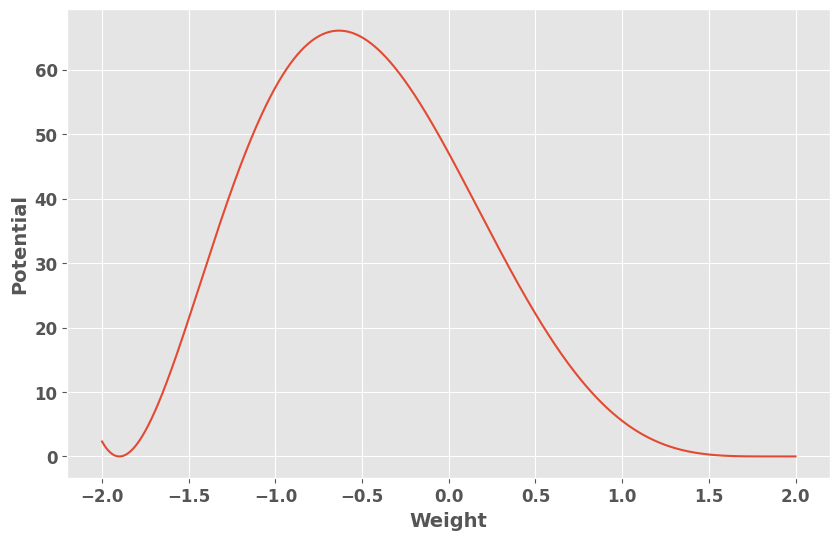

In [128]:
# Run many trajectories of SGD

d1 = 1
d2 = 2
lr = 0.01
batch_size = 30
nsamp = 10*5
num_trajectories = 500
niterations = 10*5

# Change a and b to play with the potential barrier
b = 1.9 # Singular
a = -b # regular
wmax = (2*a + b)/3
wm = 2
barrier = q(wmax, d1 ,d2, a,b)**2
trajectories = []

print(f"The local maximum is at {wmax} abd the height of the barrier is {barrier}")

for i in range(num_trajectories):
    if i % 10 == 0:
        print(f"trajectory {i} over {num_trajectories}")
    seed = i
    w_init = np.random.uniform(-wm, wm)
    # maybe seed here?
    L = SGD_batch(lr, q, grad_q, w_init, nsamp, batch_size, seed)
    L.evolve(niterations, d1, d2,a,b)
    trajectories.append(np.array(L.w).T)

trajectories = np.asarray(trajectories)

# Plot potential

wrange = np.linspace(-wm, wm, 1000)
potential = q(wrange, d1 ,d2, a,b)**2
plt.plot(wrange, potential)
plt.xlabel("Weight")
plt.ylabel("Potential")

ValueError: supplied range of [-0.4621267244433509, inf] is not finite

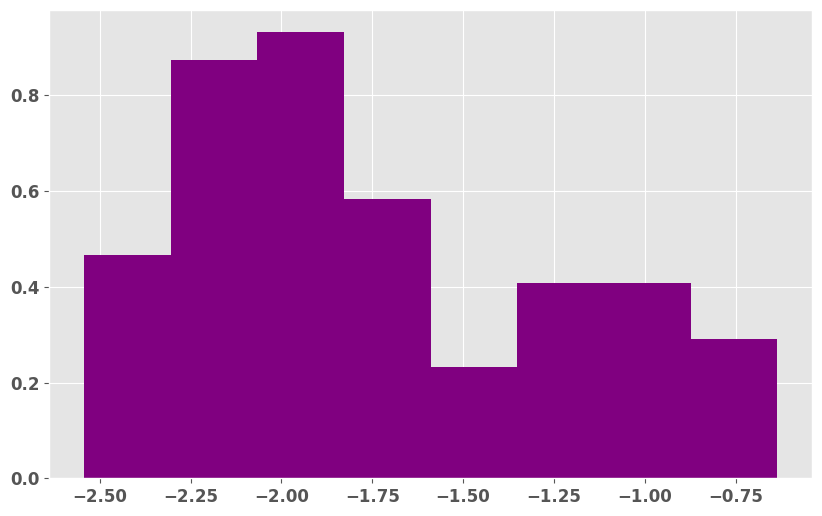

In [126]:
# Plot stationary histogram:
w_end = [trajectories[i][-1] for i in range(num_trajectories)]
regular_hist = [value for value in w_end if value < wmax]
singular_hist = [value for value in w_end if value >= wmax]
bins = "auto"
plt.hist(regular_hist, bins=bins, density=True, color="purple", label="Regular")
plt.hist(singular_hist, bins=bins, density=True, color="orange", label="Singular")
plt.axvline(wmax, color='k', linestyle='--', label="barrier")
plt.scatter([a, b], [0, 0], color='blue', s=100, zorder=5, marker='x',label='Minima')
plt.xlabel("Trajectory")
plt.ylabel("Density")
plt.legend()
plt.ylim((0,20))
plt.xlim((-2.2,2.2))

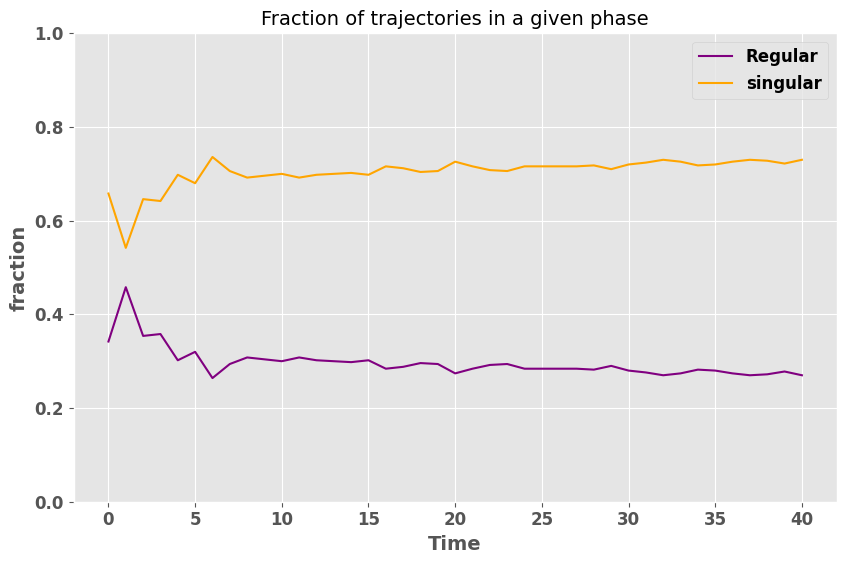

In [119]:
# Plot phase change
trajectories = np.asarray(trajectories)
phases = np.where(trajectories - wmax > 0, 1, -1)

fraction_regular_phase = np.sum(phases == -1,axis=0)/phases.shape[0]
fraction_singular_phase = np.sum(phases == 1,axis=0)/phases.shape[0]

time = np.arange(0,niterations +1,1)

plt.plot(time, fraction_regular_phase[time], label="Regular", color="purple")
plt.plot(time, fraction_singular_phase[time], label = "singular", color="orange")
plt.xlabel("Time")
plt.ylabel("fraction")
plt.title("Fraction of trajectories in a given phase")
plt.ylim((0,1))
plt.legend()

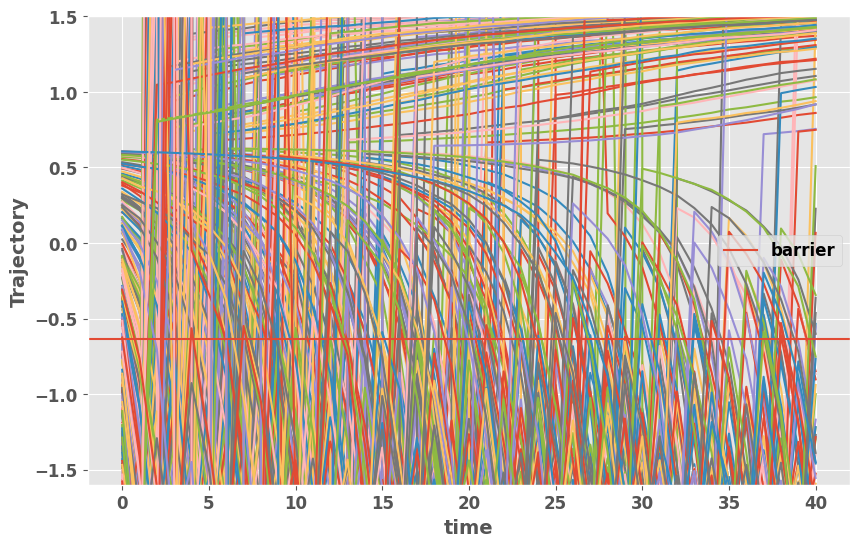

In [120]:
# Find a trajectory that change phase
init_phases = phases[:,0]
# Return the trajectories whose phases change

def phase_change(arr):
    """
    Find all rows where at least one element in that row is different from the corresponding element in the first column.
    
    Parameters:
    - arr (numpy.ndarray): Input 2D array.
    
    Returns:
    - list: Indices of rows that are different from the first column.
    """
    # Comparing each row with the first column
    different_rows = np.any(arr != arr[:, 0].reshape(-1, 1), axis=1)
    
    # Extracting the indices of the rows that are different
    return np.where(different_rows)[0].tolist()

traj_index = phase_change(phases)

traj_change = trajectories[traj_index, :]
for i in range(len(traj_index)):
    plt.plot(time, traj_change[i,:])

plt.ylim((-1.6, 1.5))
plt.axhline(y=wmax, label="barrier")
plt.xlabel("time")
plt.ylabel("Trajectory")
plt.legend()

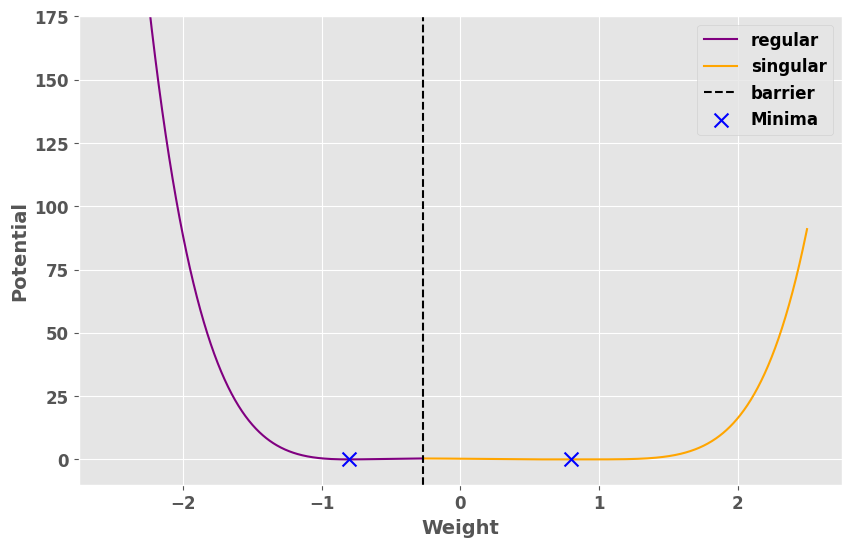

In [103]:
# Plot potential
%matplotlib inline
wm = 2.5
barrier = q(wmax, d1 ,d2, a,b)**2
wrange = np.linspace(-wm, wm, 1000)
potential = q(wrange, d1 ,d2, a,b)**2
# Split the data at x = b
regular = wrange < wmax
singular = wrange >= wmax

plt.plot(wrange[regular], potential[regular], color="purple", label="regular")
plt.plot(wrange[singular], potential[singular], color="orange", label="singular")

plt.xlabel("Weight")
plt.ylabel("Potential")
plt.axvline(x=wmax, linestyle='--' ,color="k", label="barrier")
plt.scatter([a, b], [q(a, d1 ,d2, a,b)**2, q(b, d1 ,d2, a,b)**2], color='blue', s=100, zorder=5, marker='x',label='Minima')
plt.ylim((-10, 175))
plt.legend()
plt.show()